In [78]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [3]:
pwd

'/Users/norabarry/Downloads/NLP/Project'

In [4]:
df = pd.read_csv("FATS_features/features_1000.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,328.5,0.379420,1.0,0.323656,9423.082805,163.625419,1.268593e+00,0.000000,1.578487,0.155357,...,0.099539,1.703918,237.0,0.108052,0.025452,1.0,-0.130757,171.183824,0.803425,0.595188
1,221.0,1.000000,3.0,0.006250,0.000002,156.011353,3.615728e+09,0.002088,0.258418,0.151762,...,0.064306,0.525431,151.0,0.064306,13.697982,3.0,209.578808,367.349482,0.371133,0.352287
2,456.0,0.999562,47.0,0.324721,2338.772687,115.728815,5.663617e+00,0.000000,0.977887,0.170410,...,0.284144,0.978571,323.0,0.284144,0.136157,51.0,-0.122669,232.270528,0.807068,0.517589
3,399.0,0.985592,8.0,0.321380,2782.742439,107.792931,4.593173e+00,0.000684,1.196241,0.162722,...,0.233606,1.197058,284.5,0.233606,0.084299,8.0,-0.140195,205.340558,0.804812,0.494004
4,402.0,0.999971,4.0,0.294603,1446.276861,62.002654,1.103539e+01,0.004876,1.168413,0.137574,...,0.117059,1.169289,261.0,0.117059,0.101714,4.0,0.301913,201.301749,0.784396,0.625976


In [5]:
df.shape

(1000, 59)

In [6]:
data_path = "FATS_features/"
df = pd.DataFrame()
for filename in os.listdir(data_path):
    small_df = pd.read_csv(data_path + filename, header = None)
    df = df.append(small_df)
df.shape
    

(13496, 59)

In [7]:
df = df.replace('MISSING', np.nan)
df = df.replace('Missing', np.nan)
for col in df.columns.values:
    df[col] = df[col].astype(float)
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [94]:
X = preprocessing.normalize(np.array(df))

In [96]:
inertias = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter = 1000).fit(X)
    inertias.append(kmeans.inertia_ )

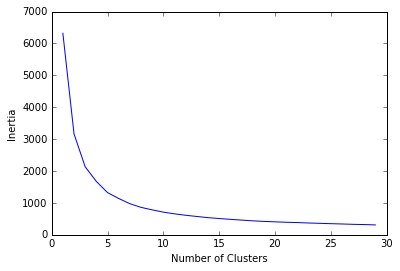

In [97]:
plt.plot(range(1,30), inertias)
plt.ylabel("Inertia")
plt.xlabel("Number of Clusters")
plt.show()

In [99]:
kmeans = KMeans(n_clusters=5, random_state=0, max_iter = 1000).fit(X)

assignments = kmeans.labels_
assignments_lst = list(assignments)
for i in range(5):
    print(assignments_lst.count(i)) 

1155
2634
3238
2759
3710


In [108]:
np.random.shuffle(X)
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim = tsne.fit_transform(X[:500,:])
low_dim.shape

(500, 2)

In [101]:
plot = []
for i in range(low_dim.shape[0]):
    plot.append(low_dim[i,:])
    
assignments = kmeans.labels_
clusters = [[] for i in range(len(assignments))]
for item, clustNum in zip(plot,assignments):
    clusters[clustNum].append( item )

In [104]:
def cluster(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter = 1000).fit(X)
    
    plot = []
    for i in range(low_dim.shape[0]):
        plot.append(low_dim[i,:])
    
    assignments = kmeans.labels_
    clusters = [[] for i in range(len(assignments))]
    for item, clustNum in zip(plot,assignments):
        clusters[clustNum].append( item )
    
    for (i,cluster) in enumerate(clusters):
        plt.scatter([item[0] for item in cluster],[item[1] for item in cluster], color=np.random.rand(3,1)) 
    plt.title("TSNE with %d Clusters" % num_clusters)
    plt.show()

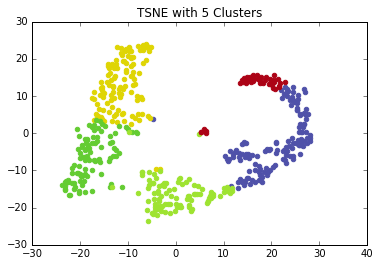

In [109]:
cluster(5)

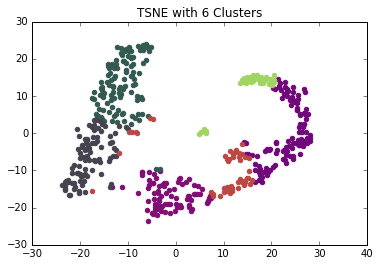

In [110]:
cluster(6)

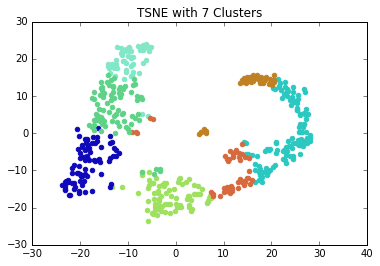

In [111]:
cluster(7)

In [ ]:
cluster(8)

In [56]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        '''plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')'''

1